# Improving models performance
- Feature Selection 
    - Correlation, Chi-Square, ANOVA
- Feature extraction
    - Principal Component Analysis
- Feature engineering
    - Create new columns, transform numerical individual columns (log, sqrt, etc.)
- Hyperparameter Tuning
- ...

In [64]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


In [3]:
credit = pd.read_csv('D:/study/datasets/credit-default.csv')
credit

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,...,real estate,67,none,own,2,1,1,yes,yes,skilled employee
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,...,real estate,22,none,own,1,2,1,none,yes,skilled employee
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,...,real estate,49,none,own,1,1,2,none,yes,unskilled resident
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,...,building society savings,45,none,for free,1,1,2,none,yes,skilled employee
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,...,unknown/none,53,none,for free,2,2,2,none,yes,skilled employee
5,unknown,36,repaid,education,9055,unknown,1 - 4 yrs,2,single male,none,...,unknown/none,35,none,for free,1,1,2,yes,yes,unskilled resident
6,unknown,24,repaid,furniture,2835,501 - 1000 DM,> 7 yrs,3,single male,none,...,building society savings,53,none,own,1,1,1,none,yes,skilled employee
7,1 - 200 DM,36,repaid,car (used),6948,< 100 DM,1 - 4 yrs,2,single male,none,...,other,35,none,rent,1,1,1,yes,yes,mangement self-employed
8,unknown,12,repaid,radio/tv,3059,> 1000 DM,4 - 7 yrs,2,divorced male,none,...,real estate,61,none,own,1,1,1,none,yes,unskilled resident
9,1 - 200 DM,30,critical,car (new),5234,< 100 DM,unemployed,4,married male,none,...,other,28,none,own,2,2,1,none,yes,mangement self-employed


In [4]:
credit['default'].head()

0    1
1    2
2    1
3    1
4    2
Name: default, dtype: int64

In [5]:
credit['default'].value_counts()

1    700
2    300
Name: default, dtype: int64

# to check null values of each column

In [6]:

pd.isnull(credit).sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_length       0
installment_rate        0
personal_status         0
other_debtors           0
residence_history       0
property                0
age                     0
installment_plan        0
housing                 0
existing_credits        0
default                 0
dependents              0
telephone               0
foreign_worker          0
job                     0
dtype: int64

In [8]:
credit.shape

(1000, 21)

In [7]:
credit_dummies = pd.get_dummies(credit)
credit_dummies.shape

(1000, 62)

# PCA

In [9]:
ellipse = pd.read_csv('D:/study/datasets/ellipse.csv')

In [10]:
ellipse.head()

,x,y
0,3.500000,4.500000
1,3.482555,4.509875
2,3.464861,4.519499
3,3.446921,4.528871
4,3.428737,4.537990


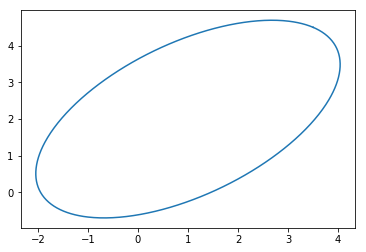

In [12]:
import matplotlib.pyplot as plt
plt.plot(ellipse['x'], ellipse['y'])

In [13]:
ellipse.shape

(629, 2)

In [16]:
from numpy.linalg import eig
evalue, evector = eig(ellipse.corr())

In [17]:
evalue, evector

(array([1.552432, 0.447568]), array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]))

In [20]:
# note that the units of your data goes away in PCA. It gives only values.
from sklearn.decomposition import PCA
pc_class = PCA()

pcs = pd.DataFrame(pc_class.fit_transform(ellipse),
                   columns=['PC1','PC2'])
pcs.head()

,PC1,PC2
0,-3.510896,-0.382795
1,-3.503481,-0.401419
2,-3.495715,-0.420003
3,-3.487598,-0.438545
4,-3.479133,-0.457043


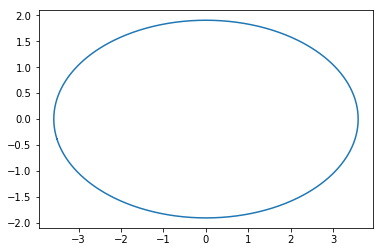

In [22]:
plt.plot(pcs['PC1'], pcs['PC2'])

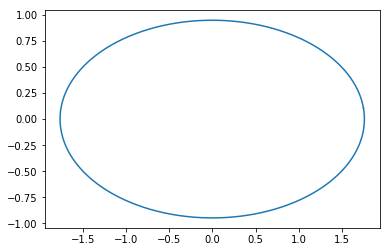

In [50]:
# important
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
ellipse_scaled = scaler.fit_transform(ellipse)

pcs = pd.DataFrame(np.dot(ellipse_scaled, evector),
                  columns= ['PC1','PC2'])
plt.plot(pcs['PC1'], pcs['PC2'])

In [40]:
pcs_reduced = pcs
pcs_reduced['PC2'] = 0
pcs_reduced.head()

,PC1,PC2
0,1.748056,0
1,1.745987,0
2,1.743744,0
3,1.741326,0
4,1.738733,0


In [33]:
ellipse_recon = np.dot(pcs_reduced, np.matrix.transpose(evector))

In [34]:
ellipse.shape

(629, 2)

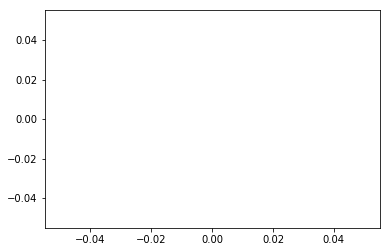

In [42]:
ellipse_recon = pd.DataFrame(ellipse_recon, columns=ellipse.columns)
plt.plot(ellipse_recon['x'], ellipse_recon['y'])

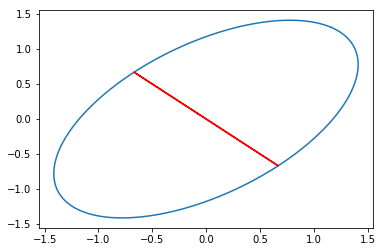

In [48]:
# run this code after running the important section above
pcs_reduced = pcs
pcs_reduced['PC1'] = 0
pcs_reduced.head()

ellipse_recon = np.dot(pcs_reduced, np.matrix.transpose(evector))

ellipse_recon = pd.DataFrame(ellipse_recon, columns=ellipse.columns)

df_ellipse_scaled = pd.DataFrame(ellipse_scaled, columns=['x','y'])
plt.plot(df_ellipse_scaled['x'], df_ellipse_scaled['y'])
plt.plot(ellipse_recon['x'], ellipse_recon['y'], color='red')

# Dimension Reduction

In [51]:
# run this after the important section above
pcs.corr()

,PC1,PC2
PC1,1.000000e+00,5.648436e-17
PC2,5.648436e-17,1.000000e+00


In [54]:
df = pd.DataFrame(np.random.randint(1,10,100), columns=['x'])
df['y'] = 0.2 * df['x'] + 10
df.corr()


,x,y
x,1.0,1.0
y,1.0,1.0


In [62]:
noise = np.random.normal(5,5,100)
df['y2'] = 0.2 * df['x'] + 10 + noise
df['y3'] = 0.2 * np.square(df['x'])
df['y4'] = 0.2 * np.sqrt(df['x'])
df['y5'] = np.power(df['x'], 5)
df.corr()

,x,y,y2,y3,y4,y5
x,1.000000,1.000000,0.207626,0.973547,0.988542,0.840935
y,1.000000,1.000000,0.207626,0.973547,0.988542,0.840935
y2,0.207626,0.207626,1.000000,0.194035,0.215664,0.159769
y3,0.973547,0.973547,0.194035,1.000000,0.929021,0.934463
y4,0.988542,0.988542,0.215664,0.929021,1.000000,0.763805
y5,0.840935,0.840935,0.159769,0.934463,0.763805,1.000000


### Linear regression canot perform well it we have too many columns
### Pca help in multiple variable analysis


# PCA for ML

In [63]:
train, test = train_test_split(credit_dummies,
                              test_size = 0.3,
                              random_state = 100)
train_x = train.drop('default', axis=1)
test_x = test.drop('default', axis=1)
train_y = train['default']
test_y = test['default']

In [66]:
# here we are fitting model with normal train and test data and we chech the sensitivity and accuracy for it
m1 = RandomForestClassifier(random_state=100)
m1.fit(train_x, train_y)
test_pred = m1.predict(test_x)

from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(test_pred, test_y))
print(classification_report(test_pred, test_y))

0.76
             precision    recall  f1-score   support

          1       0.91      0.79      0.85       253
          2       0.35      0.60      0.44        47

avg / total       0.82      0.76      0.78       300



In [71]:
# now we fit the model with the principal components

m2 = RandomForestClassifier(random_state=100)


scaler = StandardScaler()
scaler.fit(train_x)

train_x_scaled = scaler.transform(train_x)
test_x_scaled = scaler.transform(test_x)

pc_transformer = PCA()
pc_transformer.fit(train_x_scaled)
pcs_train = pc_transformer.transform(train_x_scaled)
pcs_test = pc_transformer.transform(test_x_scaled)

In [73]:
m2.fit(pcs_train, train_y)
test_pred2 = m2.predict(pcs_test)

print(accuracy_score(test_pred2, test_y))
print(classification_report(test_pred2, test_y))

0.74
             precision    recall  f1-score   support

          1       0.91      0.77      0.84       259
          2       0.27      0.54      0.36        41

avg / total       0.83      0.74      0.77       300



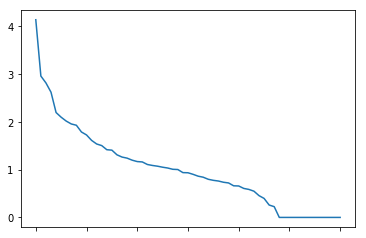

In [91]:
m3 = RandomForestClassifier(random_state=100)
cols = ['PC%d' % i for i in range(1, pcs_train.shape[1]+1)]
df_pcs_train = pd.DataFrame(pcs_train, columns=cols)
df_pcs_test = pd.DataFrame(pcs_test, columns=cols)
df_pcs_train.var().plot.line()

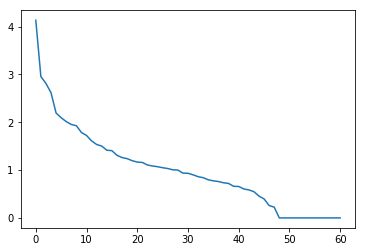

In [76]:
evalues, evectors = np.linalg.eig(pd.DataFrame(train_x_scaled).corr())
plt.plot(sorted(evalues)[::-1])

cum_vars = np.cumsum(sorted(evalues/sum(evalues)*100)[::-1])

(cum_vars<95).sum()

plt.plot(cum_vars)

In [92]:
m3 = RandomForestClassifier(random_state=100)
m3.fit(df_pcs_train.iloc[:,:41], train_y)
test_pred3 = m3.predict(df_pcs_test.iloc[:,:41])

print(accuracy_score(test_y, test_pred3))
print(classification_report(test_y, test_pred3))

0.7233333333333334
             precision    recall  f1-score   support

          1       0.76      0.90      0.83       219
          2       0.48      0.25      0.33        81

avg / total       0.69      0.72      0.69       300

